In [66]:
import pandas as pd
import altair as alt
import bootcamp_utils

In [5]:
cd ~/git/bootcamp

/Users/ladybug/git/bootcamp


In [8]:
df = pd.read_csv('data/gfmt_sleep.csv', na_values='*')
df['insomnia'] = df['sci'] <= 16

df.head()

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess,insomnia
0,8,f,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2,True
1,16,m,42,90,90,90.0,75.5,55.5,70.5,50.0,75.0,50.0,4,11,7,True
2,18,f,31,90,95,92.5,89.5,90.0,86.0,81.0,89.0,88.0,10,9,3,True
3,22,f,35,100,75,87.5,89.5,NaN,71.0,80.0,88.0,80.0,13,8,20,True
4,27,f,74,60,65,62.5,68.5,49.0,61.0,49.0,65.0,49.0,13,9,12,True


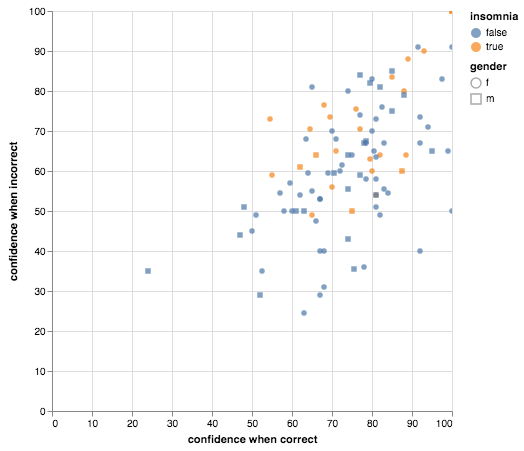

In [31]:
#instantiate Chart object based on dataframe, specify chart size in pixels
alt.Chart(
    df,
    height=400,
    width=400

#plot confidence when correct vs. when incorrect using points (the mark), filled
    ).mark_point(
        filled=True
    
#specify which columns give x and y values, data type
    ).encode(
        x='confidence when correct:Q',
        y='confidence when incorrect:Q',
        color='insomnia:N',
        shape='gender:N',
        tooltip=['gender', 'insomnia', 'percent correct']
    ).interactive()

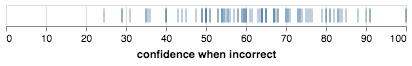

In [38]:
#how to make a strip chart
alt.Chart(df
    ).mark_tick(
    ).encode(x='confidence when incorrect:Q')

In [37]:
#export chart as html to send to someone!
chart = alt.Chart(
    df,
    height=400,
    width=400

    ).mark_point(
        filled=True
    
    ).encode(
        x='confidence when correct:Q',
        y='confidence when incorrect:Q',
        color='insomnia:N',
        shape='gender:N',
        tooltip=['gender', 'insomnia', 'percent correct']
    ).interactive()

chart.save('test.html')

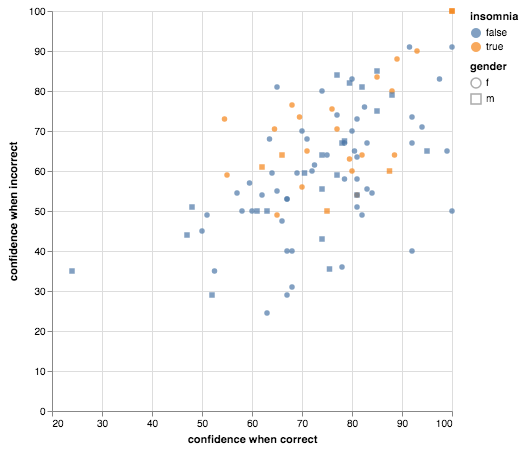

In [40]:
#same chart as above, but more verbose to adjust scales and whatnot
alt.Chart(
    df,
    height=400,
    width=400

    ).mark_point(
        filled=True
    
    ).encode(
        x=alt.X('confidence when correct',
                type='quantitative',
                scale=alt.Scale(zero=False)),
        y='confidence when incorrect:Q',
        color='insomnia:N',
        shape='gender:N')

In [52]:
df = pd.read_csv('data/frog_tongue_adhesion.csv', comment='#')

In [55]:
chart = alt.Chart(df
    ).mark_point(
    ).encode(
        x=alt.X('impact force (mN):Q'),
        y='adhesive force (mN):Q',
        color=alt.Color('ID:N',
                       title='Frog ID'))

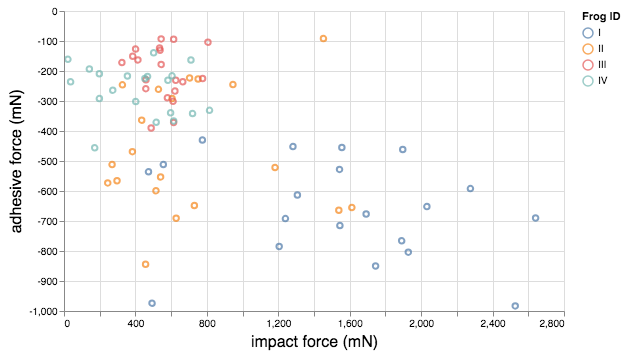

In [59]:
chart.configure_view(
        height=300, width=500
    ).configure_axis(
        titleFontSize=16,
        titleFontWeight='normal'
    ).interactive()

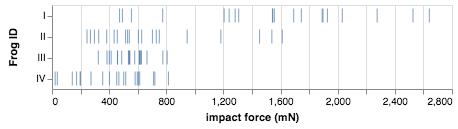

In [64]:
alt.Chart(df
    ).mark_tick(
    ).encode(
        x='impact force (mN):Q',
        y=alt.Y('ID:N', title='Frog ID')
    )

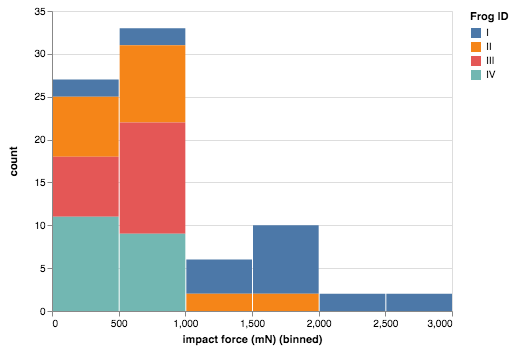

In [65]:
alt.Chart(df
    ).mark_bar(
    ).encode(
        x=alt.X('impact force (mN):Q', bin=True),
        y=alt.Y('count()', title='count'),
        color=alt.Color('ID', title='Frog ID')
    )

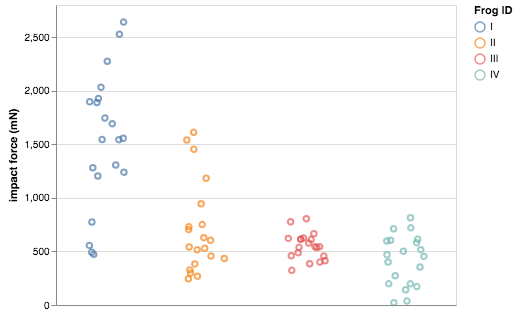

In [74]:
bootcamp_utils.altair_jitter(df,
                            encode_x=alt.X('ID:N', title='Frog ID'),
                            encode_y='impact force (mN):Q',
                            encode_tooltip=['adhesive force (mN)'])

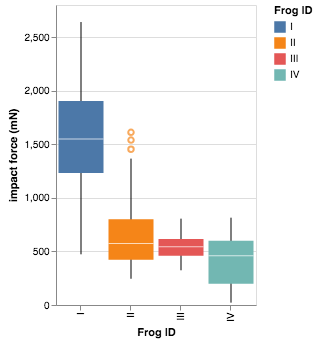

In [78]:
bootcamp_utils.altair_box(df,
                            encode_x=alt.X('ID:N', title='Frog ID'),
                            encode_y='impact force (mN):Q',
                            encode_color=alt.Color('ID:N', title='Frog ID'))

In [91]:
#aggregation in Pandas before using dataframe in Altair
df_summary = (df.groupby('ID')['impact force (mN)']
                .agg(['mean', 'sem'])
                .reset_index())

#construct error bars assuming Gaussian model (hence +-1.96)
df_summary['error low'] = df_summary['mean'] - 1.96*df_summary['sem']
df_summary['error high'] = df_summary['mean'] + 1.96*df_summary['sem']

df_summary

,ID,mean,sem,error low,error high
0,I,1530.20,140.918782,1253.999187,1806.400813
1,II,707.35,94.937466,521.272566,893.427434
2,III,550.10,27.788477,495.634584,604.565416
3,IV,419.10,52.517260,316.166170,522.033830


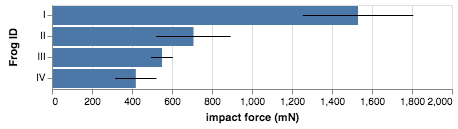

In [94]:
#constructing bars
bars = alt.Chart(df_summary
    ).mark_bar(
    ).encode(
        x=alt.X('mean:Q', title='impact force (mN)'),
        y=alt.Y('ID:N', title='Frog ID')
    )

#error bars
error_bars = alt.Chart(df_summary
    ).mark_rule(
    ).encode(
        x='error low:Q',
        x2='error high:Q',
        y=alt.Y('ID:N', title='Frog ID')
    )

#overlay error bars over bars
bars + error_bars